In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import *
from keras.models import Sequential,Model
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
((X_train,Y_train),(X_test,Y_test))=mnist.load_data()

In [3]:
print(X_train.shape)

(60000, 28, 28)


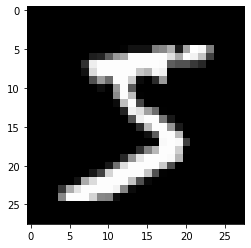

In [4]:
plt.imshow(X_train[0],cmap='gray')

In [5]:
X_train=X_train.astype('float32')
X_train=(X_train-128)/128
print(np.min(X_train))
print(np.max(X_train))
print(X_train.shape)

-1.0
0.9921875
(60000, 28, 28)


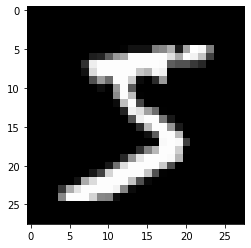

In [6]:
plt.imshow(X_train[0],cmap='gray')

In [7]:
# BEST PARAMETERS FOR GAN
Total_epochs=100
Batch_size=256
NO_OF_BATCHES=int((X_train.shape[0])/256)
HALF_BATCH=128
NOISE_DIM=100 # upscale to 784 dimension
adam=Adam(lr=2e-4,beta_1=0.5)

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
generator=Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [9]:
generator.compile(loss='binary_crossentropy',optimizer=adam)

In [10]:
# DISCRIMINATOR ,input -28*28 ouput-1/0
discriminator=Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

In [11]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [12]:
discriminator.trainable=False
# NOISE INPUT TO GEN
gan_input=Input(shape=(NOISE_DIM,))
generated_img=generator(gan_input)
# NOISE-> GEN-> OUTPUT -> DISC
gan_output=discriminator(generated_img)
model=Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)

In [13]:
print(X_train.shape)
X_Train=X_train.reshape(-1,784)
print(X_Train.shape)

(60000, 28, 28)
(60000, 784)


In [14]:
def save_imgs(epoch,samples=100):
    
    
    noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs = generator.predict(noise)
    generated_imgs = generated_imgs.reshape(samples,28,28)
    
    plt.figure(figsize=(10,10))
    
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.ylabel((10,10,i+1))
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

In [15]:
g_loss=[]
d_loss=[]
print(type(g_loss))

<class 'list'>


Instructions for updating:
Use tf.cast instead.


C:\Users\lenovo\Anaconda3\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1 Disc Loss 0.6337 Generator Loss 1.0318
Epoch 2 Disc Loss 0.6368 Generator Loss 1.0926
Epoch 3 Disc Loss 0.6319 Generator Loss 1.2301
Epoch 4 Disc Loss 0.6240 Generator Loss 1.2324
Epoch 5 Disc Loss 0.6090 Generator Loss 1.2575


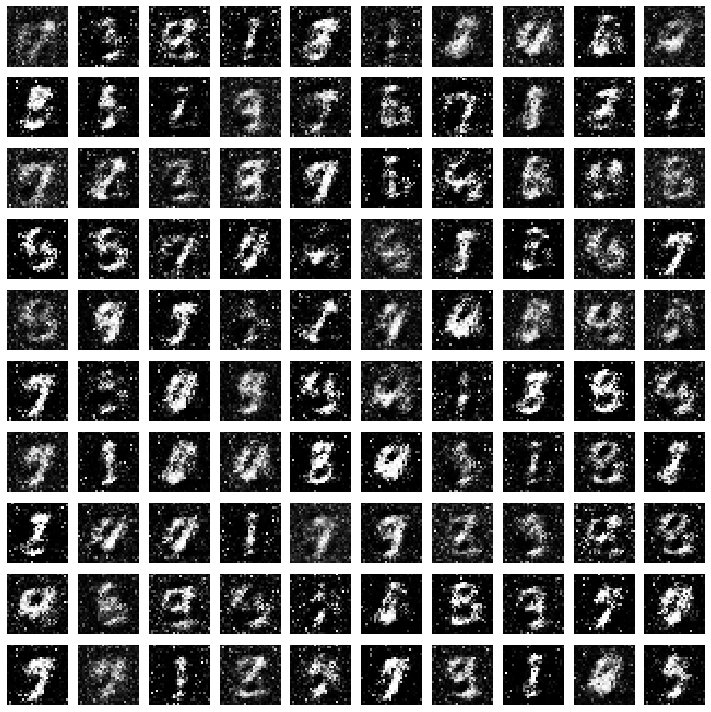

Epoch 6 Disc Loss 0.5895 Generator Loss 1.3015
Epoch 7 Disc Loss 0.5795 Generator Loss 1.3411
Epoch 8 Disc Loss 0.5756 Generator Loss 1.3237
Epoch 9 Disc Loss 0.5726 Generator Loss 1.3132
Epoch 10 Disc Loss 0.5921 Generator Loss 1.2502


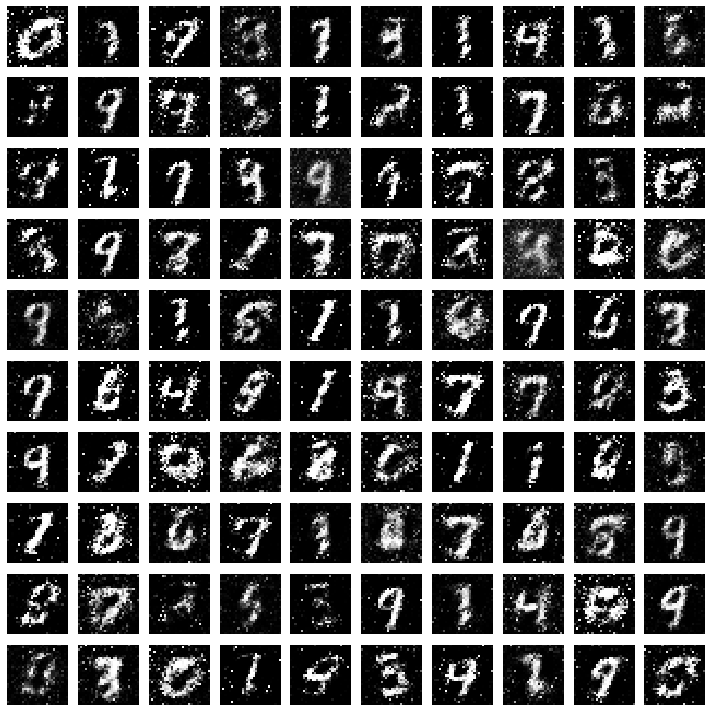

Epoch 11 Disc Loss 0.6216 Generator Loss 1.1618
Epoch 12 Disc Loss 0.6190 Generator Loss 1.1357
Epoch 13 Disc Loss 0.6375 Generator Loss 1.0833
Epoch 14 Disc Loss 0.6422 Generator Loss 1.0673
Epoch 15 Disc Loss 0.6421 Generator Loss 1.0546


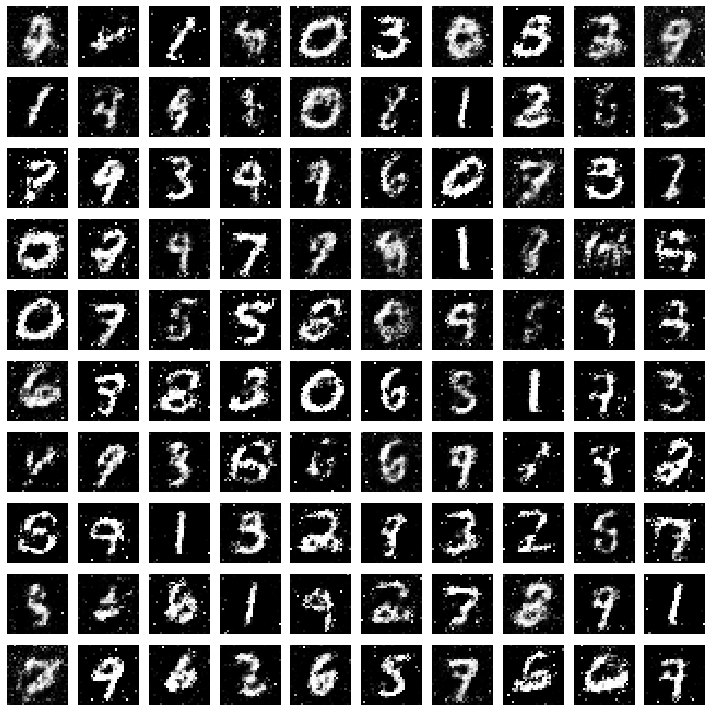

Epoch 16 Disc Loss 0.6433 Generator Loss 1.0433
Epoch 17 Disc Loss 0.6470 Generator Loss 1.0393
Epoch 18 Disc Loss 0.6505 Generator Loss 1.0313
Epoch 19 Disc Loss 0.6497 Generator Loss 1.0326
Epoch 20 Disc Loss 0.6503 Generator Loss 1.0237


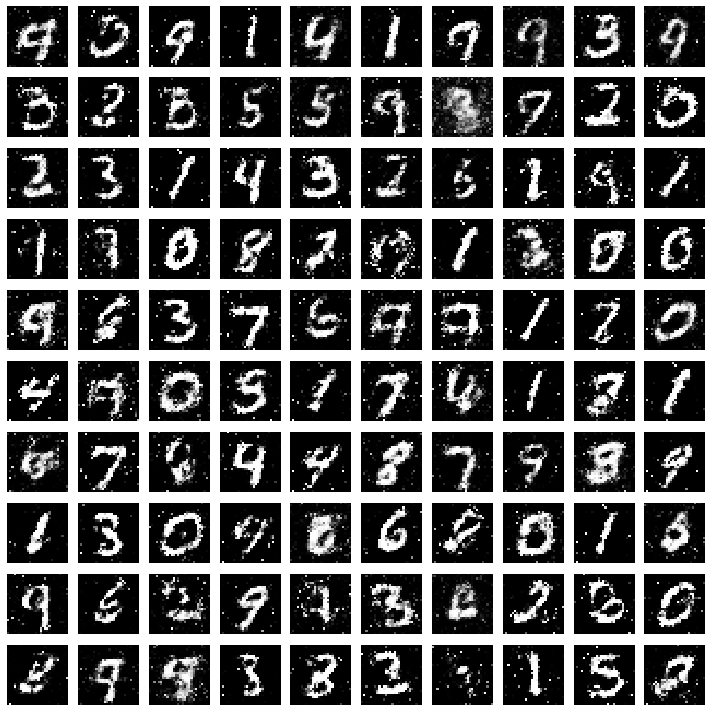

Epoch 21 Disc Loss 0.6533 Generator Loss 1.0249
Epoch 22 Disc Loss 0.6537 Generator Loss 1.0183
Epoch 23 Disc Loss 0.6547 Generator Loss 1.0177
Epoch 24 Disc Loss 0.6559 Generator Loss 1.0179
Epoch 25 Disc Loss 0.6567 Generator Loss 1.0108


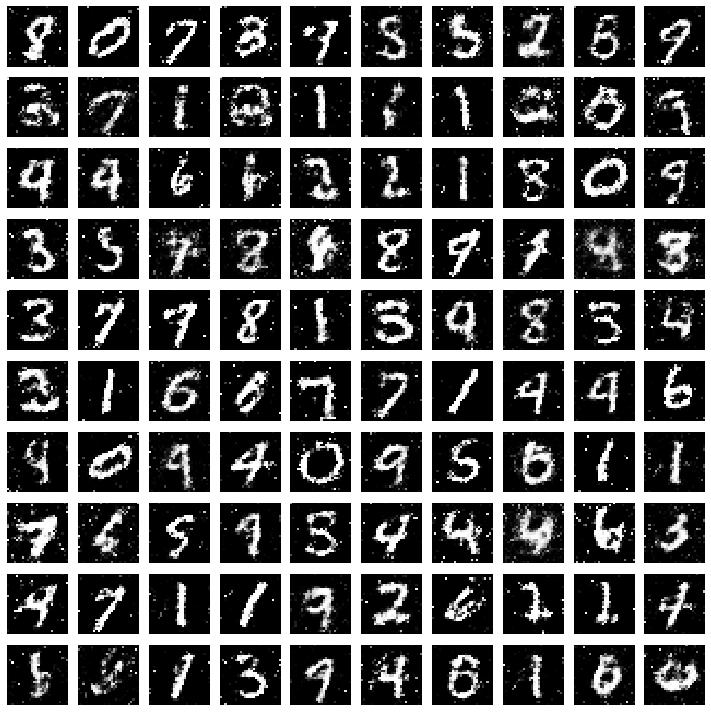

Epoch 26 Disc Loss 0.6580 Generator Loss 1.0140
Epoch 27 Disc Loss 0.6590 Generator Loss 1.0051
Epoch 28 Disc Loss 0.6588 Generator Loss 1.0072
Epoch 29 Disc Loss 0.6595 Generator Loss 1.0039
Epoch 30 Disc Loss 0.6618 Generator Loss 1.0008


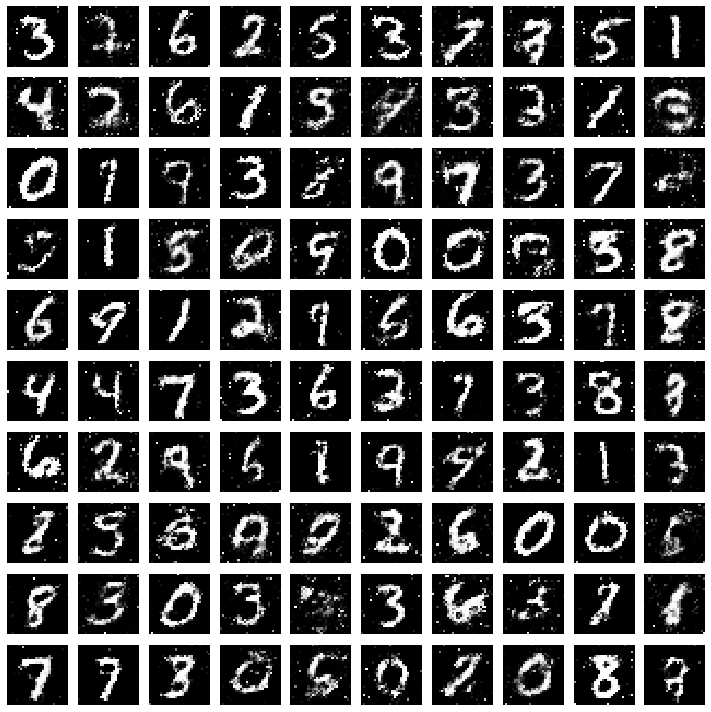

Epoch 31 Disc Loss 0.6610 Generator Loss 1.0010
Epoch 32 Disc Loss 0.6619 Generator Loss 0.9975
Epoch 33 Disc Loss 0.6625 Generator Loss 0.9938
Epoch 34 Disc Loss 0.6634 Generator Loss 1.0027
Epoch 35 Disc Loss 0.6623 Generator Loss 1.0030


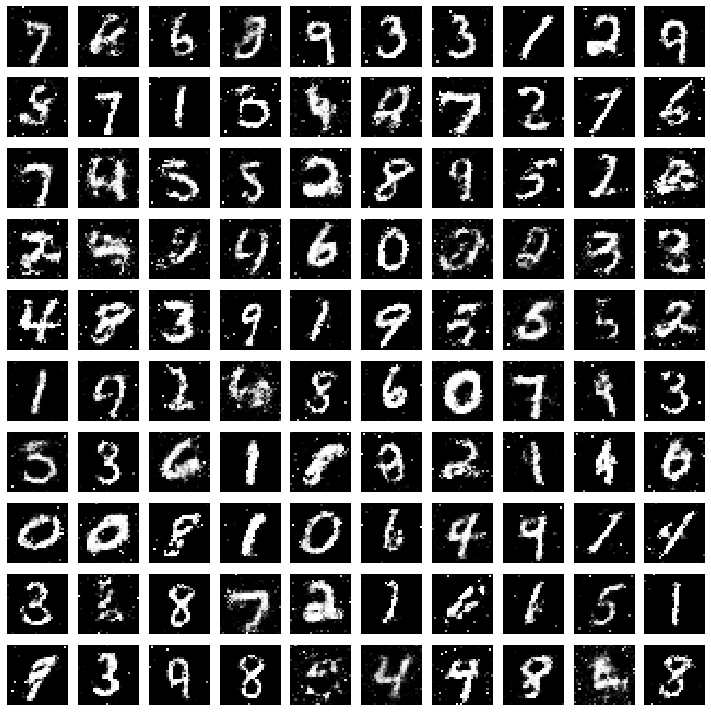

Epoch 36 Disc Loss 0.6640 Generator Loss 0.9981
Epoch 37 Disc Loss 0.6632 Generator Loss 0.9889
Epoch 38 Disc Loss 0.6650 Generator Loss 0.9868
Epoch 39 Disc Loss 0.6647 Generator Loss 0.9869
Epoch 40 Disc Loss 0.6650 Generator Loss 0.9937


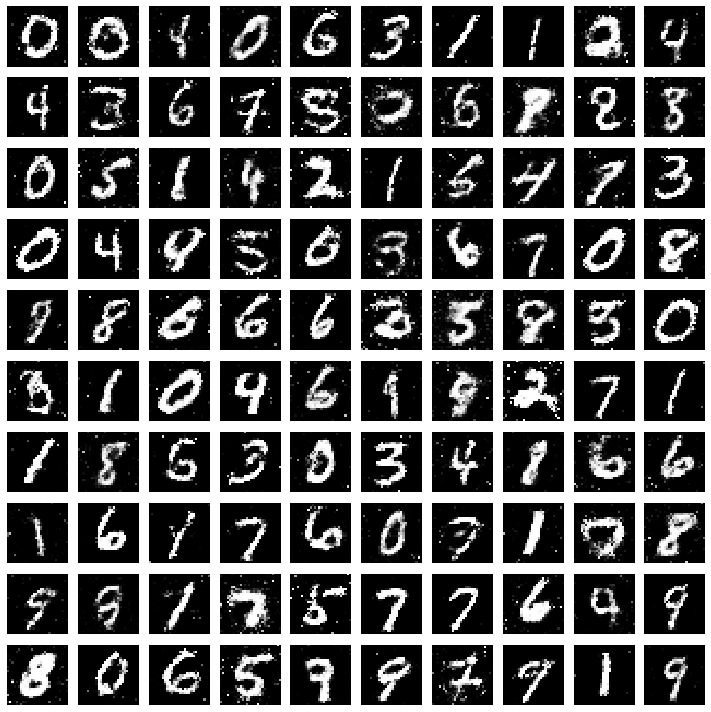

Epoch 41 Disc Loss 0.6668 Generator Loss 0.9890
Epoch 42 Disc Loss 0.6652 Generator Loss 0.9908
Epoch 43 Disc Loss 0.6671 Generator Loss 0.9936
Epoch 44 Disc Loss 0.6666 Generator Loss 0.9871
Epoch 45 Disc Loss 0.6682 Generator Loss 0.9845


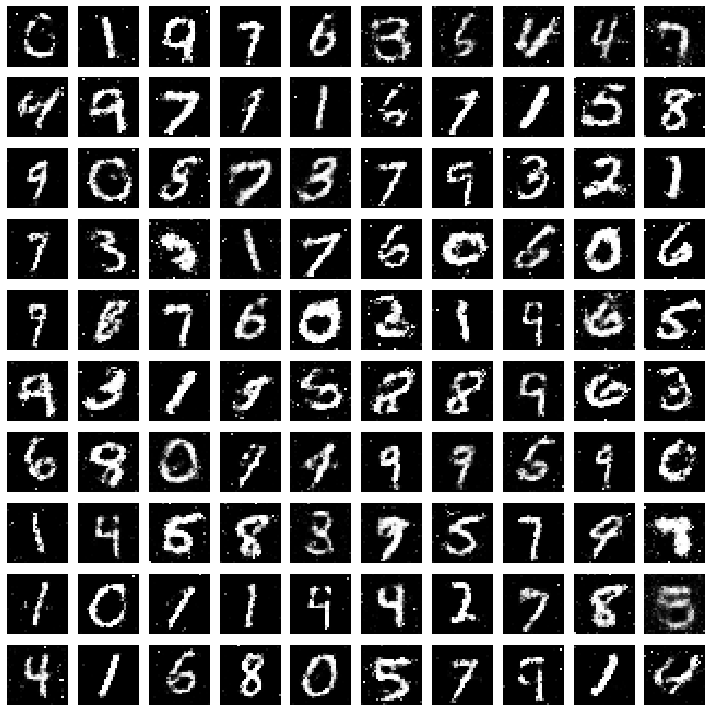

Epoch 46 Disc Loss 0.6677 Generator Loss 0.9824
Epoch 47 Disc Loss 0.6658 Generator Loss 0.9843
Epoch 48 Disc Loss 0.6675 Generator Loss 0.9873
Epoch 49 Disc Loss 0.6674 Generator Loss 0.9893
Epoch 50 Disc Loss 0.6669 Generator Loss 0.9879


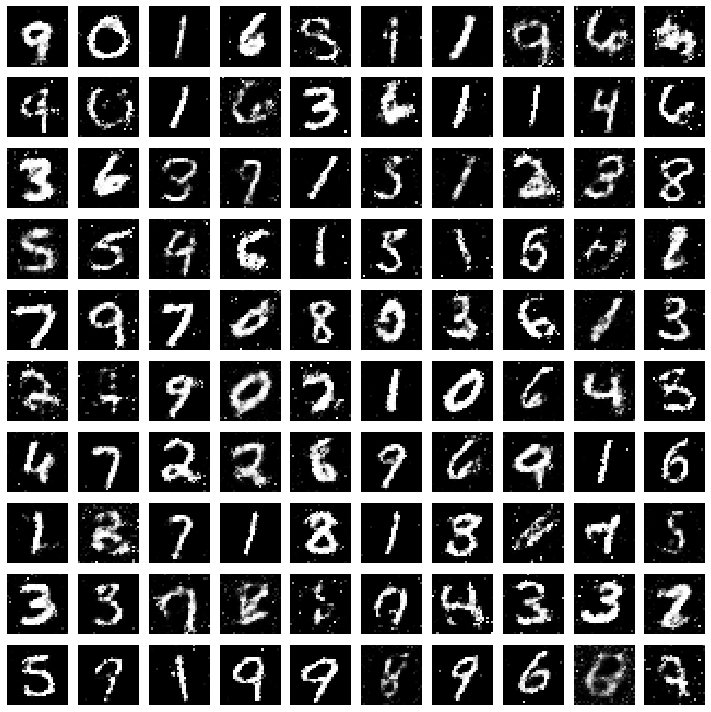

Epoch 51 Disc Loss 0.6677 Generator Loss 0.9883
Epoch 52 Disc Loss 0.6690 Generator Loss 0.9847
Epoch 53 Disc Loss 0.6692 Generator Loss 0.9794
Epoch 54 Disc Loss 0.6670 Generator Loss 0.9844
Epoch 55 Disc Loss 0.6670 Generator Loss 0.9850


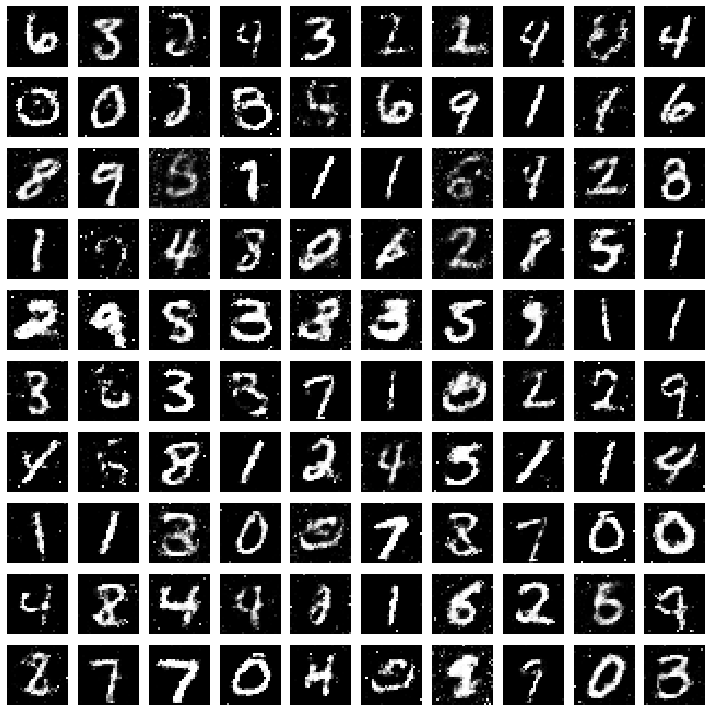

Epoch 56 Disc Loss 0.6686 Generator Loss 0.9827
Epoch 57 Disc Loss 0.6686 Generator Loss 0.9808
Epoch 58 Disc Loss 0.6682 Generator Loss 0.9925
Epoch 59 Disc Loss 0.6690 Generator Loss 0.9840
Epoch 60 Disc Loss 0.6699 Generator Loss 0.9863


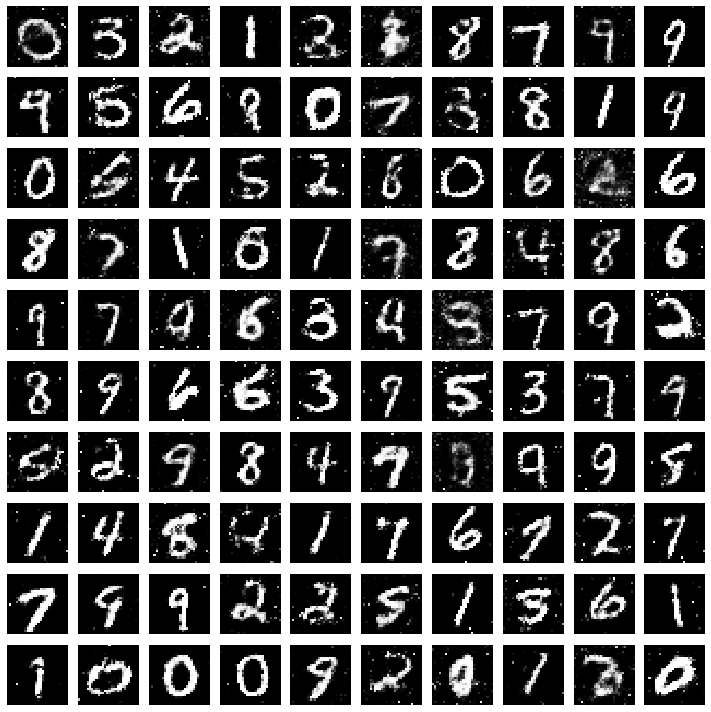

Epoch 61 Disc Loss 0.6675 Generator Loss 0.9833
Epoch 62 Disc Loss 0.6687 Generator Loss 0.9803
Epoch 63 Disc Loss 0.6681 Generator Loss 0.9835
Epoch 64 Disc Loss 0.6696 Generator Loss 0.9784
Epoch 65 Disc Loss 0.6689 Generator Loss 0.9775


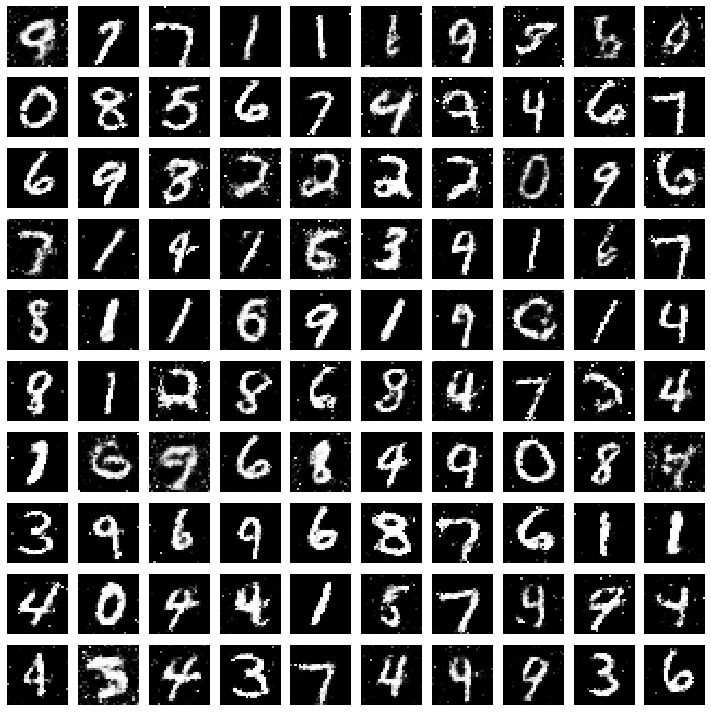

Epoch 66 Disc Loss 0.6697 Generator Loss 0.9840
Epoch 67 Disc Loss 0.6681 Generator Loss 0.9809
Epoch 68 Disc Loss 0.6680 Generator Loss 0.9803
Epoch 69 Disc Loss 0.6672 Generator Loss 0.9815
Epoch 70 Disc Loss 0.6689 Generator Loss 0.9833


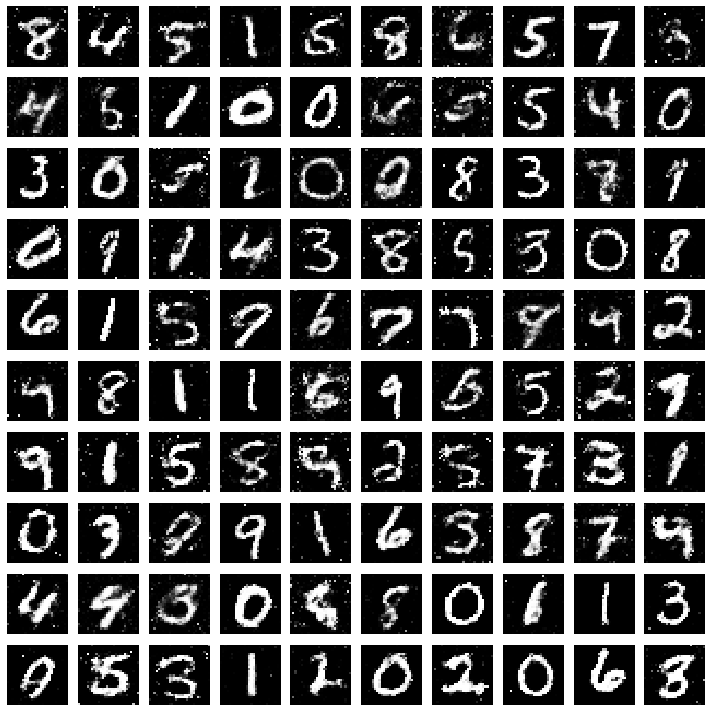

Epoch 71 Disc Loss 0.6686 Generator Loss 0.9823
Epoch 72 Disc Loss 0.6690 Generator Loss 0.9834
Epoch 73 Disc Loss 0.6692 Generator Loss 0.9782
Epoch 74 Disc Loss 0.6690 Generator Loss 0.9861
Epoch 75 Disc Loss 0.6688 Generator Loss 0.9889


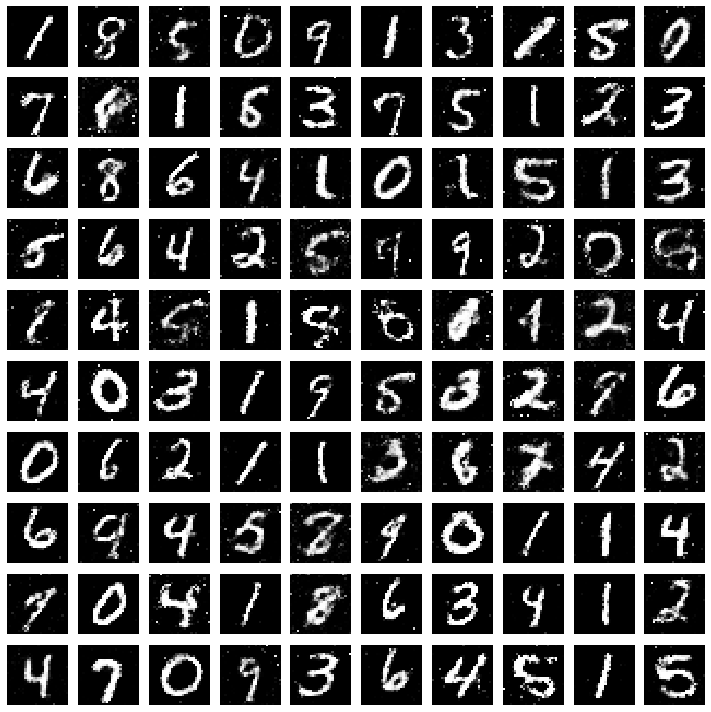

Epoch 76 Disc Loss 0.6683 Generator Loss 0.9838
Epoch 77 Disc Loss 0.6668 Generator Loss 0.9807
Epoch 78 Disc Loss 0.6679 Generator Loss 0.9838
Epoch 79 Disc Loss 0.6677 Generator Loss 0.9833
Epoch 80 Disc Loss 0.6665 Generator Loss 0.9854


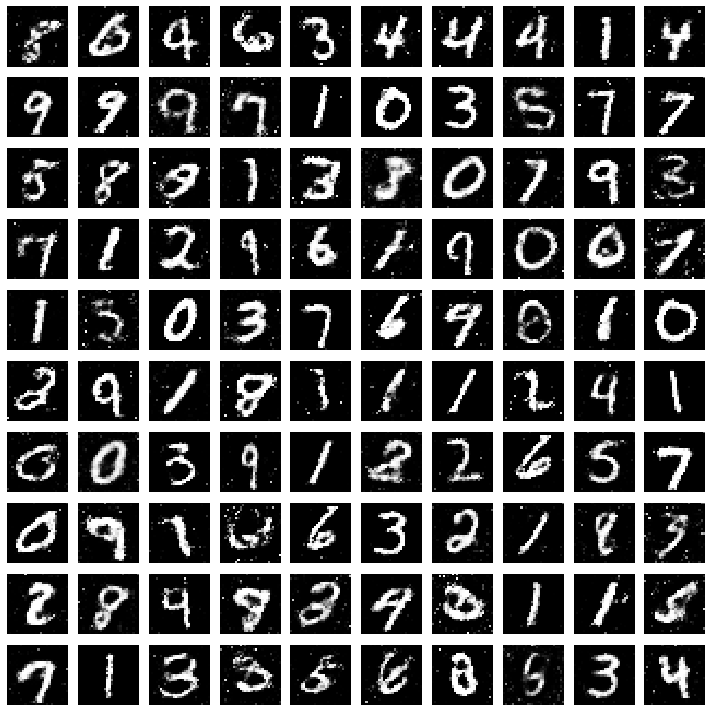

Epoch 81 Disc Loss 0.6667 Generator Loss 0.9866
Epoch 82 Disc Loss 0.6688 Generator Loss 0.9860
Epoch 83 Disc Loss 0.6681 Generator Loss 0.9858
Epoch 84 Disc Loss 0.6675 Generator Loss 0.9867
Epoch 85 Disc Loss 0.6671 Generator Loss 0.9853


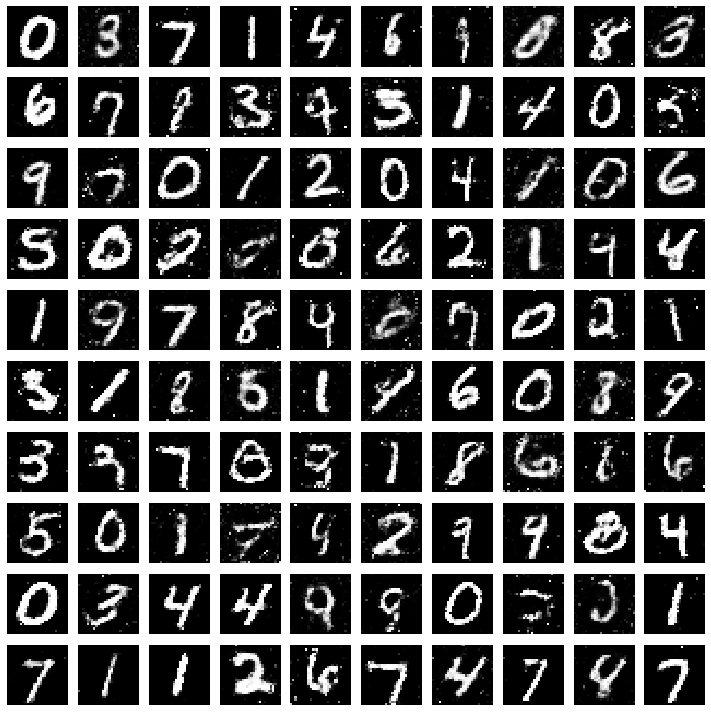

Epoch 86 Disc Loss 0.6669 Generator Loss 0.9840
Epoch 87 Disc Loss 0.6665 Generator Loss 0.9814
Epoch 88 Disc Loss 0.6676 Generator Loss 0.9854
Epoch 89 Disc Loss 0.6659 Generator Loss 0.9872
Epoch 90 Disc Loss 0.6663 Generator Loss 0.9916


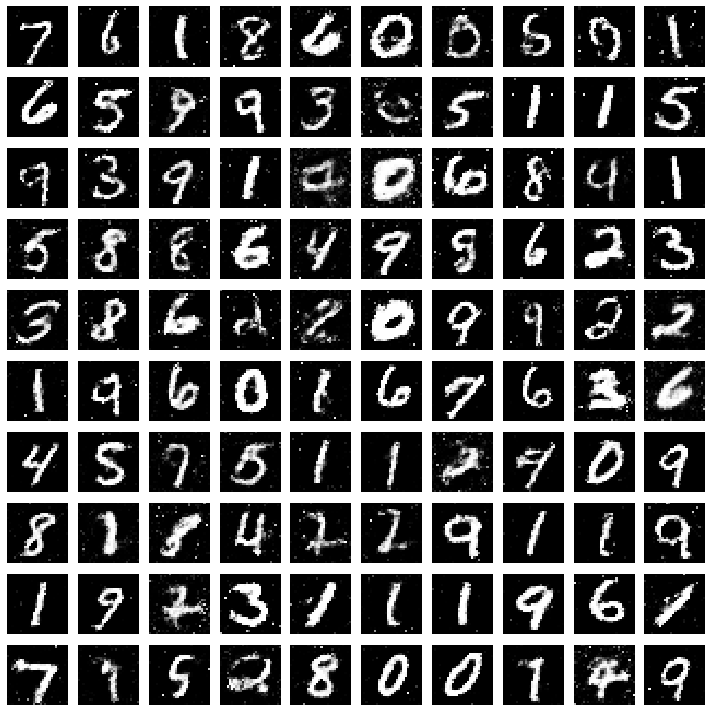

Epoch 91 Disc Loss 0.6666 Generator Loss 0.9832
Epoch 92 Disc Loss 0.6652 Generator Loss 0.9908
Epoch 93 Disc Loss 0.6663 Generator Loss 0.9855
Epoch 94 Disc Loss 0.6669 Generator Loss 0.9828
Epoch 95 Disc Loss 0.6660 Generator Loss 0.9839


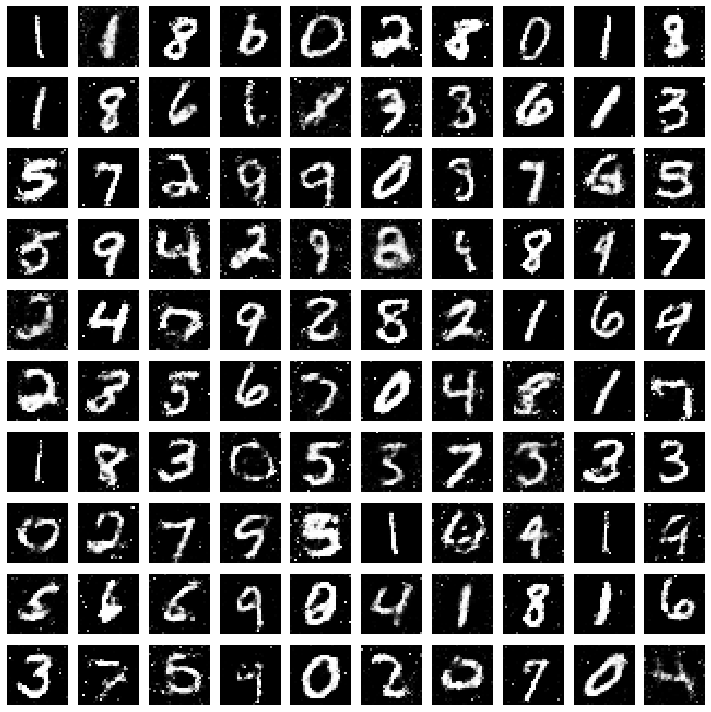

Epoch 96 Disc Loss 0.6657 Generator Loss 0.9855
Epoch 97 Disc Loss 0.6649 Generator Loss 0.9865
Epoch 98 Disc Loss 0.6655 Generator Loss 0.9917
Epoch 99 Disc Loss 0.6649 Generator Loss 0.9868
Epoch 100 Disc Loss 0.6647 Generator Loss 0.9891


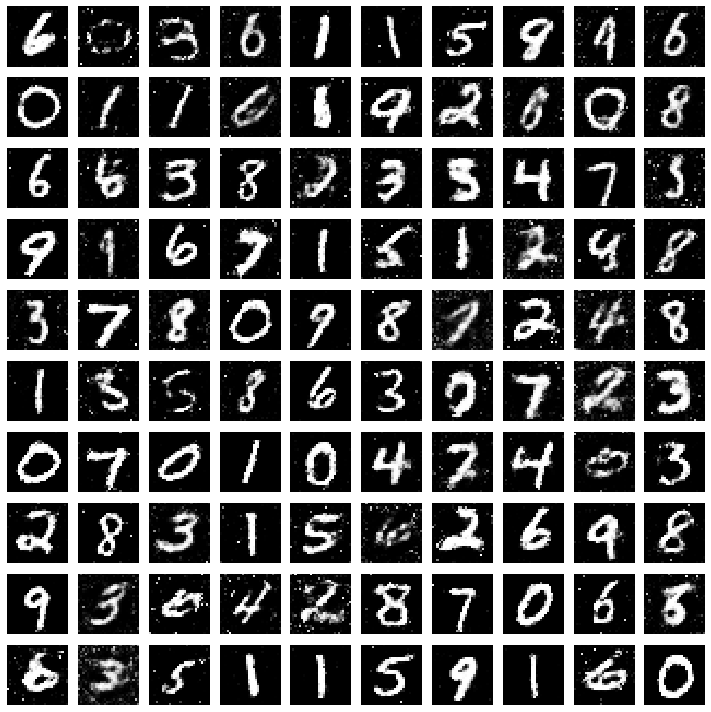

In [16]:
# Training Loop
d_losses = []
g_losses = []


for epoch in range(Total_epochs):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    #Mini Batch SGD
    for step in range(NO_OF_BATCHES):
        
        # Step-1 Discriminator 
        # 50% Real Data + 50% Fake Data
        
        #Real Data X
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
        real_imgs = X_Train[idx]
        
        #Fake Data X
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise) #Forward 
        
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(256,NOISE_DIM))
        ground_truth_y = np.ones((256,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5==0:
        generator.save('gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)
        
        
    
        
        


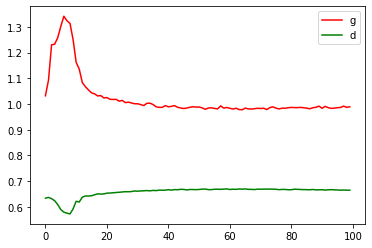

In [17]:
plt.plot(g_losses,'r',label='g')
plt.plot(d_losses,'g',label='d')
plt.legend()